# Project 4 Team Luther Tweeten

Hi! We are Team Luther Tweeten (Jana Ariss, Jerry Jiao, Brian So, Steffany Wong, Sean Kim, Yinan Xia, and Nick Everest). Our project focuses on the Nigerian food system and its correlating nutritional context. We hope to understand the background of Nigeria's food ways in addition to estimating their food demand and constructing a nutritional system. Then we will apply certain policy proposals to address nutritional deficiences in the region.

## Deliverable [A] Estimate Demand System

We will first begin with estimating Nigeria's demand system. This begins with the installing all requirements and importing necessary packages.

In [1]:
!pip install -r requirements.txt

  Using cached CFEDemands-0.4.1-py2.py3-none-any.whl (39 kB)
  Using cached gspread-5.3.2-py3-none-any.whl (34 kB)
  Using cached numpy-1.22.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached pandas-1.4.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
  Using cached plotly-5.7.0-py2.py3-none-any.whl (28.8 MB)
  Using cached eep153_tools-0.11-py2.py3-none-any.whl (4.4 kB)
Processing /home/jovyan/.cache/pip/wheels/20/7e/30/7d702acd6a1e89911301cd9dbf9cb9870ca80c0e64bc2cde23/gnupg-2.3.1-py3-none-any.whl
  Using cached ConsumerDemands-0.3.dev0-py2.py3-none-any.whl (12 kB)
  Attempting uninstall: gspread
    Found existing installation: gspread 4.0.1
    Uninstalling gspread-4.0.1:
      Successfully uninstalled gspread-4.0.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  A

In [2]:
import cfe

cfe.Result?

Missing dependencies for OracleDemands.


Now we can load in the Nigeria dataset provided by our professor!

In [3]:
r = cfe.from_dataset('./Nigeria_small.ds',engine='netcdf4')

r

<xarray.Result>
Dimensions:           (i: 124, k: 14, t: 4, m: 1, u: 21, j: 8522, kp: 14)
Coordinates:
  * i                 (i) object '(Cocoyam, Spinach, etc)' ... 'Yam-roots'
  * k                 (k) object 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 31-50' 'F 51+'
  * t                 (t) int64 2010 2012 2015 2018
  * m                 (m) int64 1
  * u                 (u) object '1. KILOGRAMS (KG)' ... 'litre (l)'
  * j                 (j) object '100001' '100002' '100003' ... '99096' '99098'
  * kp                (kp) object 'F 0-3' 'F 14-18' ... 'M 51+' 'M 9-13'
Data variables: (12/20)
    alpha             (i) float64 4.138 4.828 nan nan ... 5.031 nan nan 5.717
    beta              (i) float64 0.2647 0.4927 nan nan ... 0.3716 nan nan 0.31
    delta             (k, i) float64 -0.01694 0.03455 nan ... nan nan 0.08949
    prices            (t, m, i, u) float64 nan nan nan nan ... nan nan nan nan
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 nan ... nan nan nan 1.0
    loglambdas        (j, t, m) float64 nan nan 0.3517 nan ... nan nan 0.9968
    ...                ...
    se_beta           float64 nan
    se_alpha          (i) float64 0.05958 0.046 0.0 0.0 ... 0.0 0.0 0.02184
    se_a              (i, t, m) float64 0.05958 0.05604 ... 0.02325 0.0213
    y                 object None
    logp              (t, m, i, u) float64 nan nan nan nan ... nan nan nan nan
    z                 (k, j, t, m) float64 0.0 0.0 0.0 nan ... nan nan nan 1.0
Attributes:
    firstround:            2010
    min_proportion_items:  0.125
    min_xproducts:         30
    all_tm:                True
    common_alpha:          True
    useless_expenditures:  None
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    iterate:               False
    verbose:               False

To make things more readable, we will consolidate the units.

In [4]:
r.u

<xarray.DataArray 'u' (u: 21)>
array(['1. KILOGRAMS (KG)', '2. GRAMS (G)', '2. GRAMS (GR)', '3. LITRES (L)',
       '4. CENTILITRES (CL)', 'Basin: Big/Large (40 kg)',
       'Basin: Medium (25 kg)', 'Basin: Small (10 kg)',
       'Basket: Medium (30 kg)', 'Basket: Small (15 kg)',
       'Bunch of Plantain/FFB: Small (5 kg)',
       'Bunch of plantain/FFB: Big (15 kg)',
       'Bunch of plantain/FFB: Medium (8 kg)', 'Grams', 'Kilograms', 'Litres',
       'Mililitre', 'centilitre (cl)', 'grams (g)', 'kilogram (kg)',
       'litre (l)'], dtype=object)
Coordinates:
  * u        (u) object '1. KILOGRAMS (KG)' '2. GRAMS (G)' ... 'litre (l)'

In [5]:
r.prices = r.prices.sel(u=['kilogram (kg)','1. KILOGRAMS (KG)','Kilograms']).dropna('i',how='all').sum('u')

In [6]:
#r.prices.sel(u=['kilogram (kg)','1. KILOGRAMS (KG)','Kilograms']).dropna('i',how='all').sel(i='Milk powder').to_dataframe('u')

In [7]:
r.get_predicted_expenditures(as_df=True)['Milk powder']

/opt/conda/lib/python3.9/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


j       t     m
100001  2015  1    152.220375
100002  2012  1    276.705041
        2015  1    414.680511
100003  2010  1    377.241762
        2012  1    519.330083
                      ...    
99077   2018  1    155.936920
99079   2018  1    217.469558
99088   2018  1     72.283421
99096   2018  1    229.988649
99098   2018  1    100.220712
Name: Milk powder, Length: 6432, dtype: float64

In [8]:
r.get_alpha(as_df=True).dropna()

i
(Cocoyam, Spinach, etc)                 4.137737
Agricultural eggs                       4.828057
Bananas                                 4.752126
Beef                                    6.097617
Beer (local and imported)               5.850864
Bread                                   5.065000
Brown beans                             5.226534
Chicken                                 6.381765
Chocolate drinks                        5.264990
Cocoyam                                 4.954118
Condiments,(salt,spices,pepper, etc)    3.358059
Fish-Dried                              5.577516
Fish-Fresh                              6.208897
Fish-Frozen                             5.722683
Fish-Smoked                             5.389794
Garden eggs/egg plant                   4.155502
Gari -Yellow                            5.333468
Gari-White                              5.244837
Goat                                    6.398805
Groundnut oil                           5.270093
Malt drinks       

In [9]:
r.get_beta(as_df=True).dropna()

i
(Cocoyam, Spinach, etc)                 0.264663
Agricultural eggs                       0.492709
Bananas                                 0.334000
Beef                                    0.315412
Beer (local and imported)               0.327214
Bread                                   0.346662
Brown beans                             0.316207
Chicken                                 0.276107
Chocolate drinks                        0.541461
Cocoyam                                 0.241237
Condiments,(salt,spices,pepper, etc)    0.414796
Fish-Dried                              0.403277
Fish-Fresh                              0.386942
Fish-Frozen                             0.226933
Fish-Smoked                             0.354824
Garden eggs/egg plant                   0.240667
Gari -Yellow                            0.272450
Gari-White                              0.316419
Goat                                    0.282581
Groundnut oil                           0.344536
Malt drinks       

In [10]:
from cfe.df_utils import to_dataframe
to_dataframe(r.delta).unstack("k")

k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+
i,,,,,,,,,,,,,,
"(Cocoyam, Spinach, etc)",-0.016940,0.045847,-0.005505,-0.017215,0.032895,0.033067,0.141298,-0.023781,0.015007,0.021452,0.027689,0.094989,0.110343,0.048901
Agricultural eggs,0.034552,0.096835,0.018018,0.053636,0.084221,0.209310,0.214793,0.042721,0.048441,0.020054,0.048770,0.098147,0.148663,0.048849
Bananas,0.087191,0.014969,0.041125,0.074841,0.056436,0.097571,0.099270,0.024251,-0.010054,0.036853,0.035830,0.071993,0.100703,0.006572
Beef,0.031357,0.040075,0.022819,0.067268,0.088596,0.156118,0.157754,0.006855,0.028480,0.044742,0.067865,0.088548,0.103018,0.027693
Beer (local and imported),0.010837,0.067073,-0.007325,-0.037233,0.090008,0.113648,0.053466,0.046941,0.034432,-0.008684,0.016815,0.016893,0.080541,0.021043
Bread,0.003213,0.077405,0.035565,0.076229,0.082149,0.148911,0.175974,0.023225,0.046668,0.060806,0.080997,0.096974,0.099630,0.013089
Brown beans,0.042174,0.095950,0.089248,0.078895,0.055726,0.129848,0.138940,0.028881,0.029328,0.067292,0.081007,0.078684,0.109293,0.083297
Chicken,-0.065475,0.076064,-0.048039,-0.016739,0.046631,0.095953,0.194257,-0.071763,0.001326,0.006518,-0.004462,0.060025,0.195275,0.091070
Chocolate drinks,0.084639,0.007797,0.027564,0.063775,0.063896,0.164630,0.167554,0.070132,0.027591,0.011240,0.092243,0.165170,0.115693,0.035243


The triple of parameters $(\alpha,\beta,\delta)$ completely describes
the demand system and the corresponding utility function (over the
goods we observe).



Now that we have simplified and cleaned the dataset, we can begin to comput Marchallian demands as done in lecture.



In [11]:
t = r.firstround  # First round
m = r.coords['m'][0] # First market

x = r.get_predicted_expenditures().sum('i')
median_x = x.where(x>0).sel(t=t,m=m).median('j') # Budget (median household)

# Note selection of prices for 1975 for market A
p = r.prices.sel(t=t,m=m).fillna(1).copy()

p.to_dataframe().fillna(1).squeeze()
# p = p.drop("u")
p

/opt/conda/lib/python3.9/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


<xarray.DataArray 'prices' (i: 103)>
array([ 68.315621, 202.653897,   0.      ,  72.225457, 231.375755,
        90.821855, 461.599232,  38.754296,   0.      , 102.388627,
       142.080756, 130.242559, 128.150683,  43.036814,  45.883362,
       440.628414,  30.104512,  34.444198,   0.      , 513.588919,
       674.060828,  62.384184, 653.846154,   2.570305,   0.      ,
       310.97038 , 252.308978, 293.192625, 298.477485,   0.762623,
       162.085961,   0.      , 103.251146,  58.165672,  92.222754,
        58.032733, 486.575342, 399.886122,   0.      , 221.239344,
        71.148007,  53.732298, 175.73441 , 201.940242,  75.165792,
        60.508915,   0.      ,  95.230839,  97.776685,  52.395501,
         0.      ,   0.      , 355.316887, 137.791363,  49.858175,
        54.983398,   0.      , 140.781098, 100.610711,   3.288411,
        70.874965, 226.201673, 104.607811, 174.485676, 349.958089,
       365.171249,  83.55461 ,  66.298087, 121.676609, 376.543771,
       171.135171, 159.940677, 104.25101 , 214.129725, 127.165962,
        25.777035, 222.521857,   0.      , 150.728058,  93.979817,
       108.477559, 117.070492, 349.149603,  81.496036, 167.48104 ,
       106.867644,   8.092877,   0.      , 313.029678,  65.957146,
        87.464554,  96.292608,   1.527715, 112.26298 , 172.949669,
        58.928495,  14.966415,   0.      ,  98.954978, 101.311511,
       426.200899, 225.491453,  61.296256])
Coordinates:
  * i        (i) object '(Cocoyam, Spinach, etc)' ... 'Yam-roots'
    t        int64 2010
    m        int64 1

Now compute expenditures on different items.  The object `r` already knows what the estimated
parameters are, and uses those automatically:



In [12]:
c=r.demands(median_x,p)
c

i
(Cocoyam, Spinach, etc)                  1.683836
Agricultural eggs                        2.169352
Bananas                                  2.154764
Beef                                     1.889941
Beer (local and imported)                4.015982
Bread                                    2.117247
Brown beans                              2.144282
Chicken                                  1.833468
Chocolate drinks                         1.547901
Cocoyam                                  2.001316
Condiments,(salt,spices,pepper, etc)     6.384233
Fish-Dried                               2.334321
Fish-Fresh                               2.717149
Fish-Frozen                              1.602941
Fish-Smoked                             15.453283
Garden eggs/egg plant                    1.676680
Gari -Yellow                             2.182408
Gari-White                               2.786807
Goat                                     2.005620
Groundnut oil                            1.94177

Now we can trace out demands for a household with median budget but
varying prices of (say) coconuts (holding other prices fixed):



No handles with labels found to put in legend.


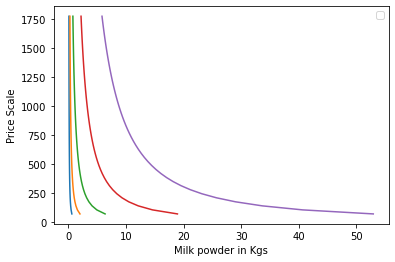

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

USE_GOOD = 'Milk powder'
    
# Values for prices
ref_price = r.prices.sel(i=USE_GOOD,t=t,m=m)
P = np.linspace(ref_price/5,ref_price*5,50)

def my_prices(p0,p=p,i=USE_GOOD):
    p = p.copy()
    p.loc[i] = p0
    return p

for myx in [median_x*s for s in [.25,.5,1.,2,4]]:
    plt.plot([r.demands(myx,my_prices(p0))[USE_GOOD] for p0 in P],P)

plt.xlabel("%s in Kgs" % USE_GOOD)
plt.ylabel('Price Scale')
plt.legend()

Engel curve: response of expenditure on target good as budget increases

Text(0.5, 0, 'Budget')

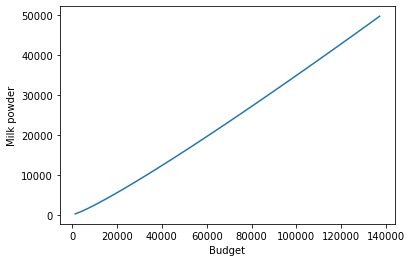

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# USE_GOOD = 'Wheat'
    
# Values for prices
ref_price = r.prices.sel(i=USE_GOOD,t=t,m=m)

# Range of budgets to consider
X = np.linspace(median_x/10,median_x*10,50)

plt.plot(X,[r.demands(x,ref_price)[USE_GOOD] for x in X])

plt.ylabel(USE_GOOD)
plt.xlabel('Budget')

## Deliverable [A] Construct Nutrient System

We can begin with our second project goal to detail Nigeria's nutrient system given food demand.

This needs the food data from project 2 to run (ie the data folder in project 2).

In [15]:
!pip uninstall cfe
!pip install -r requirements.txt

In [16]:
import cfe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#r = cfe.result.from_dataset('Indian ICRISAT_small.ds',engine='netcdf4')
r = cfe.result.from_dataset('Nigeria_small.ds',engine = 'netcdf4')
UseNutrients=['Protein','Calories','Iron']

# Reference period, market
#t,m = 75,1
t,m = 2010,1

# Reference budget (find mean in reference period & market):
reference_x = r.get_predicted_expenditures().mean('j').sum('i').sel(t=t,m=m)

p = r.prices.sel(t=t,m=m,drop=True)
p = p.to_dataframe('i').squeeze().dropna()
p

/opt/conda/lib/python3.9/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


i                        u                    
(Cocoyam, Spinach, etc)  Basket: Small (15 kg)    2121.212121
                         Grams                       0.139593
                         Kilograms                  68.315621
Agricultural eggs        Basin: Small (10 kg)       25.161967
                         Basket: Small (15 kg)      27.268338
                                                     ...     
Yam flour                Kilograms                 225.491453
Yam-roots                Basin: Small (10 kg)      435.393258
                         Basket: Small (15 kg)     304.000000
                         Grams                       0.098436
                         Kilograms                  61.296256
Name: i, Length: 297, dtype: float64

This first round, averaged over households and villages.

In [17]:
zbar = r.z.sel(t=r.firstround,drop=True).mean(['j','m'])[:].squeeze() # Leave out log HSize

zbar = zbar.to_dataframe().squeeze()

We need diet minimums for project2 to run.

In [19]:
bmin = pd.read_csv('../Project2/diet_minimums.csv').set_index('Nutrition').iloc[:,2:]
bmin['M 0-3'] = bmin['C 1-3']
bmin['F 0-3'] = bmin['C 1-3']
bmin = bmin.drop(columns = ['C 1-3'])
bmin

,F 4-8,M 4-8,F 9-13,M 9-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+,M 0-3,F 0-3
Nutrition,,,,,,,,,,,,,,
Energy,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0,1000.0,1000.0
Protein,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0,13.0,13.0
"Fiber, total dietary",16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0,14.0,14.0
"Folate, DFE",200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,150.0,150.0
"Calcium, Ca",1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0,700.0,700.0
"Carbohydrate, by difference",130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
"Iron, Fe",10.0,10.0,8.0,8.0,15.0,11.0,18.0,8.0,18.0,8.0,8.0,8.0,7.0,7.0
"Magnesium, Mg",130.0,130.0,240.0,240.0,360.0,410.0,310.0,400.0,320.0,420.0,320.0,420.0,80.0,80.0
Niacin,8.0,8.0,12.0,12.0,14.0,16.0,14.0,16.0,14.0,16.0,14.0,16.0,6.0,6.0


In [20]:
#rda = pd.read_pickle('indian_rda.df').T
rda = bmin
# May need to tweak types or alignment to match RDA and zbar types:
rda0,zbar0=rda.align(zbar,axis=1)

# This matrix product gives minimum nutrient requirements for average
# household in 1975
hh_rda = rda0.replace('',0)@zbar0

# RDA is /daily/, but  demands in ICRISAT data are /annual/:
hh_rda = hh_rda*7

Now we can produce the household weekly recommended nutrient intake.

In [21]:
hh_rda

Nutrition
Energy                             69597.396787
Protein                             1541.084808
Fiber, total dietary                 974.363555
Folate, DFE                        12960.463697
Calcium, Ca                        42004.555623
Carbohydrate, by difference         5230.510474
Iron, Fe                             433.014846
Magnesium, Mg                      11027.982510
Niacin                               494.256661
Phosphorus, P                      30869.387838
Potassium, K                      173432.011389
Riboflavin                            38.837828
Thiamin                               37.723978
Vitamin A, RAE                     25826.682937
Vitamin B-12                          77.762782
Vitamin B-6                           43.119544
Vitamin C, total ascorbic acid      2331.923937
Vitamin E (alpha-tocopherol)         483.172260
Vitamin K (phylloquinone)           3123.036404
Zinc, Zn                             311.829571
dtype: float64

In [37]:
!pip install eep153_tools
!pip install gspread
!pip install fooddatacentral

ERROR: Could not find a version that satisfies the requirement fooddatacentral (from versions: none)
ERROR: No matching distribution found for fooddatacentral


In [33]:
from eep153_tools.sheets import read_sheets
DataURL = '1crT3R7MaSdT2H2W7HF-4N_7_zzgM4It0iuzmS10TV2w'
fct = read_sheets(DataURL)
Nigeria_nutrition = fct['Codes'][['Food description','USDA FDC ID']].rename(columns = {'Food description':'Food','USDA FDC ID':'FDC'})
Nigeria_nutrition

Key available for students@eep153.iam.gserviceaccount.com.


,Food,FDC
0,Guinea corn/sorghum,169716
1,Millet,168871
2,Maize,1441697
3,Rice--local,169757
4,Rice--imported,169757
...,...,...
91,Beer (local and imported),1104393
92,Palm wine,173185
93,Pito,1104393
94,Gin,1104487


***This cell will error when you try to run it. To fix, go to the Project2 folder, select both the "Data" folder and fooddatacentral.py and in the upper left corner hit the "Move" button and move it to the Project4 folder. You can also duplicate those first and then move, but make sure to rename the files once they are moved to Project4 and remove the (1) that is appended to the name. Text 6572821109 if you have any questions***

In [39]:
import fooddatacentral as fdc
#apikey = "98io1g6FBoC8R3VH3ixwfMmoZHEtTge9UyS9kouU"
apikey = "6dOSTulT97hD6btEezfeO876tZyzbrLhmY0LL8uf"
id = 169400    # Put an FDC ID HERE!
fdc.nutrients(apikey,fdc_id=id)

,Quantity,Units
Proximates,0.000,g
Water,92.500,g
Energy,96.000,kJ
Protein,2.980,g
Total lipid (fat),0.780,g
Ash,1.040,g
Carbohydrates,0.000,g
"Carbohydrate, by difference",2.710,g
"Fiber, total dietary",2.100,g
Minerals,0.000,mg


We now fill in FDC codes that were outdated in the list we were given.

In [40]:
Nigeria_nutrition = Nigeria_nutrition.set_index('Food')
Nigeria_nutrition.loc['Maize'] = 1103351
Nigeria_nutrition.loc['Milk powder'] = 1970648
Nigeria_nutrition.loc['Cassava flour'] = 1955537
Nigeria_nutrition.loc['Butter/Margarine'] = 1956025
Nigeria_nutrition

,FDC
Food,
Guinea corn/sorghum,169716
Millet,168871
Maize,1103351
Rice--local,169757
Rice--imported,169757
...,...
Beer (local and imported),1104393
Palm wine,173185
Pito,1104393


In [41]:
Nigeria_nutrition = Nigeria_nutrition.reset_index()
Nigeria_nutrition

,Food,FDC
0,Guinea corn/sorghum,169716
1,Millet,168871
2,Maize,1103351
3,Rice--local,169757
4,Rice--imported,169757
...,...,...
91,Beer (local and imported),1104393
92,Palm wine,173185
93,Pito,1104393
94,Gin,1104487


Once again we need to make a new fct table for Nigeria.

***This cell may take a while to run***

In [42]:
#the original class function
import warnings
apikey = "6dOSTulT97hD6btEezfeO876tZyzbrLhmY0LL8uf" 
df = Nigeria_nutrition
D = {}
count = 0
for food in df.Food.tolist():
    try:
        FDC = df.loc[df.Food==food,:].FDC[count]
        count+=1
        D[food] = fdc.nutrients(apikey,FDC).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find FDC Code %s for food %s." % (food,FDC))        

D = pd.DataFrame(D,dtype=float)

D

,Guinea corn/sorghum,Millet,Maize,Rice--local,Rice--imported,Bread,Maize flour,Yam flour,Cassava flour,Wheat flour,...,Sachet water,Malt drinks,"Soft drinks (Coca Cola, spirit, etc)",Fruit juice canned/Pack,Other non--alcoholic drinks,Beer (local and imported),Palm wine,Pito,Gin,Other alcoholic beverages
Alanine,1.033,0.314,NaN,0.156,0.156,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
"Alcohol, ethyl",NaN,0.000,0.00,0.000,0.000,NaN,NaN,NaN,NaN,NaN,...,0.00,7.70,0.00,0.00,NaN,3.90,10.40,3.90,33.40,33.40
Amino acids,0.000,0.000,0.00,0.000,0.000,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00
Arginine,0.355,0.122,NaN,0.224,0.224,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
Ash,1.430,0.410,NaN,0.410,0.410,2.10,1.44,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.24,NaN,NaN,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vitamin K (Menaquinone-4),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vitamin K (phylloquinone),NaN,0.300,0.30,0.000,0.000,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,2.30,NaN,0.00,0.00,0.00,0.00,NaN
Vitamins and Other Components,0.000,0.000,0.00,0.000,0.000,0.00,0.00,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00
Water,12.400,71.410,76.05,68.440,68.440,35.70,10.83,NaN,NaN,NaN,...,99.90,91.00,89.36,86.71,NaN,91.96,86.58,91.96,66.60,66.60


In [43]:
Food = D.T.fillna(0)
Food = Food.reset_index().rename(columns={'index':'i'}).set_index('i')
Food

,Alanine,"Alcohol, ethyl",Amino acids,Arginine,Ash,Aspartic acid,Betaine,"Boron, B",Caffeine,"Calcium, Ca",...,"Vitamin D (D2 + D3), International Units",Vitamin D3 (cholecalciferol),Vitamin E (alpha-tocopherol),"Vitamin E, added",Vitamin K (Dihydrophylloquinone),Vitamin K (Menaquinone-4),Vitamin K (phylloquinone),Vitamins and Other Components,Water,"Zinc, Zn"
i,,,,,,,,,,,,,,,,,,,,,
Guinea corn/sorghum,1.033,0.0,0.0,0.355,1.43,0.743,0.0,0.0,0.0,13.0,...,0.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,12.40,1.67
Millet,0.314,0.0,0.0,0.122,0.41,0.231,0.0,0.0,0.0,3.0,...,0.0,0.0,0.02,0.0,0.0,0.0,0.3,0.0,71.41,0.91
Maize,0.000,0.0,0.0,0.000,0.00,0.000,0.0,0.0,0.0,2.0,...,0.0,0.0,0.07,0.0,0.0,0.0,0.3,0.0,76.05,0.46
Rice--local,0.156,0.0,0.0,0.224,0.41,0.253,0.0,0.0,0.0,10.0,...,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,68.44,0.49
Rice--imported,0.156,0.0,0.0,0.224,0.41,0.253,0.0,0.0,0.0,10.0,...,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,68.44,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Beer (local and imported),0.000,3.9,0.0,0.000,0.00,0.000,0.0,0.0,0.0,4.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,91.96,0.01
Palm wine,0.000,10.4,0.0,0.000,0.24,0.000,0.0,0.0,0.0,8.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,86.58,0.13
Pito,0.000,3.9,0.0,0.000,0.00,0.000,0.0,0.0,0.0,4.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,91.96,0.01


For Nigeria:

DataURL = '1crT3R7MaSdT2H2W7HF-4N_7_zzgM4It0iuzmS10TV2w'
fct = read_sheets(DataURL)
type(fct)
pd.DataFrame(fct,index=[0])

In [51]:
def my_prices(p0,p=p,i='Coconut'):
    p = p.copy()
    p.loc[i] = p0
    return p

In [52]:
fct = Food

In [53]:
fct['Protein'].index

Index(['Guinea corn/sorghum', 'Millet', 'Maize', 'Rice--local',
       'Rice--imported', 'Bread', 'Maize flour', 'Yam flour', 'Cassava flour',
       'Wheat flour', 'Other grains and flour', 'Cassava--roots', 'Yam--roots',
       'Gari--white', 'Gari--yellow', 'Cocoyam', 'Plantains', 'Sweet potatoes',
       'Potatoes', 'Other roots and tuber', 'Soya beans', 'Brown beans',
       'White beans', 'Groundnuts', 'Other nuts/seeds/pulses', 'Palm oil',
       'Butter/Margarine', 'Groundnut oil', 'Other oils and fats', 'Bananas',
       'Orange/tangerine', 'Mangoes', 'Avocado pear', 'Pineapples',
       'Fruit canned', 'Other fruits', 'Tomatoes', 'Tomato puree (canned)',
       'Onions', 'Garden eggs/egg plant', 'Okra--fresh', 'Okra--dried',
       'Pepper', 'Leaves (Cocoyam, Spinach, etc.)',
       'Other vegetables (fresh or canned)', 'Chicken', 'Duck',
       'Other domestic poultry', 'Agricultural eggs', 'Local eggs',
       'Other eggs (not chicken)', 'Beef', 'Mutton', 'Pork', 'Goat',
  

In [54]:
fct = fct.rename({'Fish--dried':'Fish-Dried','Fish--fresh':'Fish-Fresh','Fish--frozen':'Fish-Frozen','Fish--smoked':'Fish-Smoked',
                 'Rice--imported':'Rice-Imported','Rice--local':'Rice-local'},axis = 'index')
#'Fish-Dried', 'Fish-Fresh', 'Fish-Frozen', 'Fish-Smoked',

Somehow the above listed labels get messed up in the cfe so need to rename to fix the issue. Then we check to see that the issue is fixed.

In [55]:
fct.index

Index(['Guinea corn/sorghum', 'Millet', 'Maize', 'Rice-local', 'Rice-Imported',
       'Bread', 'Maize flour', 'Yam flour', 'Cassava flour', 'Wheat flour',
       'Other grains and flour', 'Cassava--roots', 'Yam--roots', 'Gari--white',
       'Gari--yellow', 'Cocoyam', 'Plantains', 'Sweet potatoes', 'Potatoes',
       'Other roots and tuber', 'Soya beans', 'Brown beans', 'White beans',
       'Groundnuts', 'Other nuts/seeds/pulses', 'Palm oil', 'Butter/Margarine',
       'Groundnut oil', 'Other oils and fats', 'Bananas', 'Orange/tangerine',
       'Mangoes', 'Avocado pear', 'Pineapples', 'Fruit canned', 'Other fruits',
       'Tomatoes', 'Tomato puree (canned)', 'Onions', 'Garden eggs/egg plant',
       'Okra--fresh', 'Okra--dried', 'Pepper',
       'Leaves (Cocoyam, Spinach, etc.)', 'Other vegetables (fresh or canned)',
       'Chicken', 'Duck', 'Other domestic poultry', 'Agricultural eggs',
       'Local eggs', 'Other eggs (not chicken)', 'Beef', 'Mutton', 'Pork',
       'Goat', 'Wil

In [56]:
import warnings 

def nutrient_demand(x,p):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        c = r.demands(x,p)

    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

In [57]:
original_p = p
original_p

i                        u                    
(Cocoyam, Spinach, etc)  Basket: Small (15 kg)    2121.212121
                         Grams                       0.139593
                         Kilograms                  68.315621
Agricultural eggs        Basin: Small (10 kg)       25.161967
                         Basket: Small (15 kg)      27.268338
                                                     ...     
Yam flour                Kilograms                 225.491453
Yam-roots                Basin: Small (10 kg)      435.393258
                         Basket: Small (15 kg)     304.000000
                         Grams                       0.098436
                         Kilograms                  61.296256
Name: i, Length: 297, dtype: float64

In [58]:
#selecting only units of kilograms
p = p.unstack('u')['Kilograms']

In [59]:
#all labels in original price vector
len(pd.DataFrame(original_p).rename(columns = {'i':'i original'}).reset_index()['i'].unique())

90

In [60]:
#all labels in kilogram parsed vector
len(pd.DataFrame(p).rename(columns = {'i':'i original'}).reset_index()['i'].unique())

90

In [61]:
sum(p.isna())

0

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(uf

Text(0, 0.5, 'log nutrient')

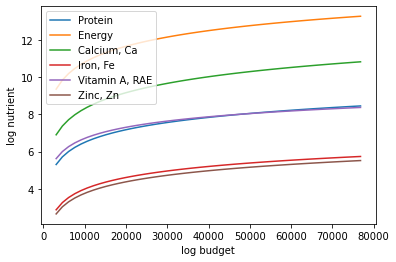

In [62]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(reference_x/5,reference_x*5,50)

UseNutrients = ['Protein','Energy','Calcium, Ca','Iron, Fe','Vitamin A, RAE', 'Zinc, Zn']
df = pd.concat({myx:np.log(nutrient_demand(myx,p))[UseNutrients] for myx in X},axis=1).T
ax = df.plot()

ax.set_xlabel('log budget')
ax.set_ylabel('log nutrient')

In [63]:
def my_prices(p0,p=p,i='Coconut'):
    p = p.copy()
    p.loc[i] = p0
    return p

Here we figured out the most important sources of protein (also did for various other nutrients!)

In [64]:
pd.DataFrame(fct['Calcium, Ca'].sort_values(ascending = False).index)

,i
0,Milk powder
1,Pepper
2,Okra--dried
3,Milk tinned (unsweetened)
4,White beans
...,...
91,Gari--yellow
92,Gari--white
93,Other grains and flour
94,Wheat flour


In [65]:
pd.DataFrame(p.index.values).isin(r.prices.sel(t=t,m=m,drop=True).i.values)

,0
0,True
1,True
2,True
3,True
4,True
...,...
85,True
86,True
87,True
88,True


In [66]:
r.prices.sel(t=t,m=m,drop=True).i.values

array(['(Cocoyam, Spinach, etc)', 'Agricultural eggs', 'Animal fat',
       'Apples', 'Avocado pear', 'Baby milk powder', 'Bananas', 'Beef',
       'Beer (local and imported)', 'Biscuits', 'Bottled water', 'Bread',
       'Brown beans', 'Buns/PofPof/Donuts', 'Butter/Margarine', 'Cake',
       'Canned', 'Canned beef/corned beef', 'Canned fish/seafood',
       'Cashew nut', 'Cassava flour', 'Cassava-Roots', 'Cheese (wara)',
       'Chicken', 'Chocolate drinks', 'Coconut', 'Coconut oil', 'Cocoyam',
       'Coffee', 'Condiments,(salt,spices,pepper, etc)', 'Dry pepper',
       'Duck', 'Fish-Dried', 'Fish-Fresh', 'Fish-Frozen', 'Fish-Smoked',
       'Fresh milk', 'Fresh pepper', 'Fruit juice canned',
       'Garden eggs/egg plant', 'Gari -Yellow', 'Gari-White', 'Gin',
       'Goat', 'Grinded pepper', 'Groundnut oil', 'Groundnuts',
       'Groundnuts (shelled)', 'Groundnuts (unshelled)', 'Guava',
       'Guinea Corn/Sorghum', 'Honey', 'Jams', 'Kola nut', 'Local eggs',
       'Maize', 'Maize (

In [67]:
r.prices.sel(t=t,m=m,drop=True).i

<xarray.DataArray 'i' (i: 124)>
array(['(Cocoyam, Spinach, etc)', 'Agricultural eggs', 'Animal fat', 'Apples',
       'Avocado pear', 'Baby milk powder', 'Bananas', 'Beef',
       'Beer (local and imported)', 'Biscuits', 'Bottled water', 'Bread',
       'Brown beans', 'Buns/PofPof/Donuts', 'Butter/Margarine', 'Cake',
       'Canned', 'Canned beef/corned beef', 'Canned fish/seafood',
       'Cashew nut', 'Cassava flour', 'Cassava-Roots', 'Cheese (wara)',
       'Chicken', 'Chocolate drinks', 'Coconut', 'Coconut oil', 'Cocoyam',
       'Coffee', 'Condiments,(salt,spices,pepper, etc)', 'Dry pepper', 'Duck',
       'Fish-Dried', 'Fish-Fresh', 'Fish-Frozen', 'Fish-Smoked', 'Fresh milk',
       'Fresh pepper', 'Fruit juice canned', 'Garden eggs/egg plant',
       'Gari -Yellow', 'Gari-White', 'Gin', 'Goat', 'Grinded pepper',
       'Groundnut oil', 'Groundnuts', 'Groundnuts (shelled)',
       'Groundnuts (unshelled)', 'Guava', 'Guinea Corn/Sorghum', 'Honey',
       'Jams', 'Kola nut', 'Local eggs', 'Maize', 'Maize (off the cob/grains)',
       'Maize (on the cob)', 'Maize (shelled/off the cob)',
       'Maize (shelled/on the cob)', 'Maize (unshelled/on the cob)',
       'Maize flour', 'Maize shelled', 'Malt drinks', 'Mangoes',
       'Meat pie/Sausage roll', 'Melon (ground)', 'Melon (shelled)',
       'Melon (unshelled)', 'Milk powder', 'Milk tinned (unsweetened)',
       'Millet', 'Mutton', 'Ogbonno grinded', 'Ogbonno ungrinded',
       'Okra-dried', 'Okra-fresh', 'Onions', 'Orange/tangerine',
       'Other Non-acoholic drinks', 'Other Oil and Fat',
       'Other alcoholic beverages', 'Other domestic poultry',
       'Other eggs (not chicken)', 'Other fish or seafood', 'Other fruites',
       'Other grains and flour', 'Other meat (excl. poultry)',
       'Other milk products', 'Other non-acoholic drinks',
       'Other nuts/seeds/pulses', 'Other oils and fats',
       'Other roots and tuber', 'Other sweets Confectionary',
       'Other vegetables (fresh or canned)', 'Palm oil', 'Palm wine', 'Pawpaw',
       'Pepper', 'Pineapples', 'Pito', 'Plantains', 'Pork', 'Potatoes',
       'Rice-Imported', 'Rice-local', 'Sachet water', 'Salt',
       'Seafood (lobster, crab, prawns)', 'Sheabutter', 'Snails',
       'Soft drinks (Coca cola, spirit etc)', 'Soya beans', 'Sugar',
       'Sweet Potatoes', 'Tea', 'Tomato puree(canned)', 'Tomatoes',
       'Watermelon', 'Wheat flour', 'White beans', 'Wild game meat',
       'Yam flour', 'Yam-roots'], dtype=object)
Coordinates:
  * i        (i) object '(Cocoyam, Spinach, etc)' ... 'Yam-roots'

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(uf

Text(0, 0.5, 'log nutrient')

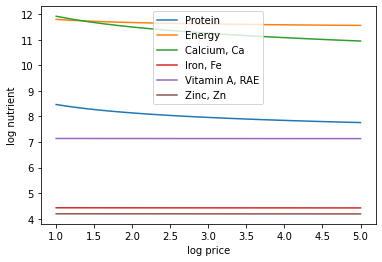

In [68]:
USE_GOOD = 'Milk powder'

ref_price = r.prices.sel(i=USE_GOOD,t=t,m=m,drop=True)

P =  np.linspace(1,5,20).tolist()

ndf = pd.DataFrame({p0:np.log(nutrient_demand(reference_x,my_prices(p0,i=USE_GOOD)))[UseNutrients] for p0 in P}).T

ax = ndf.plot()

ax.set_xlabel('log price')
ax.set_ylabel('log nutrient')

In [69]:
#nutritional adaquecy part
def nutrient_adequacy_ratio(x,p):
    return nutrient_demand(x,p)/hh_rda

In [70]:
hh_rda

Nutrition
Energy                             69597.396787
Protein                             1541.084808
Fiber, total dietary                 974.363555
Folate, DFE                        12960.463697
Calcium, Ca                        42004.555623
Carbohydrate, by difference         5230.510474
Iron, Fe                             433.014846
Magnesium, Mg                      11027.982510
Niacin                               494.256661
Phosphorus, P                      30869.387838
Potassium, K                      173432.011389
Riboflavin                            38.837828
Thiamin                               37.723978
Vitamin A, RAE                     25826.682937
Vitamin B-12                          77.762782
Vitamin B-6                           43.119544
Vitamin C, total ascorbic acid      2331.923937
Vitamin E (alpha-tocopherol)         483.172260
Vitamin K (phylloquinone)           3123.036404
Zinc, Zn                             311.829571
dtype: float64

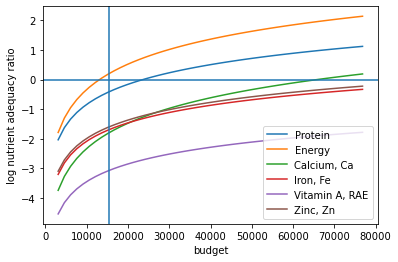

In [71]:
#the normal one
X = np.linspace(reference_x/5,reference_x*5,50)

ndf = pd.concat({x:np.log(nutrient_adequacy_ratio(x,p))[UseNutrients] for x in X},axis=1).T

ax = ndf.plot()

ax.set_xlabel('budget')
ax.set_ylabel('log nutrient adequacy ratio')
ax.axhline(0)
ax.axvline(reference_x)

In [72]:
USE_GOOD = 'Canned beef/corned beef'

Tracing nutritional adaquacy while changing price of a certain good.

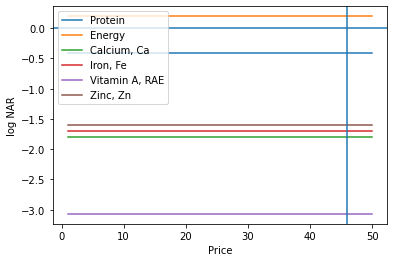

In [73]:
poorer_x = reference_x/2
#reference_x = the average budget
Pscale = np.linspace(1,50,100).tolist()
#need to change scale to fit the price of the good
log_nar = {s0:np.log(nutrient_adequacy_ratio(reference_x,my_prices(s0,p,i=USE_GOOD)))[UseNutrients] for s0 in Pscale}

log_nar = pd.DataFrame(log_nar).T

ax = log_nar.plot(ylabel='log NAR',xlabel='Price')


ax.axhline(0)
#ax.set_xlim([1,3])
ax.axvline(p[USE_GOOD])

In [74]:
USE_GOOD = 'Fish-Dried'

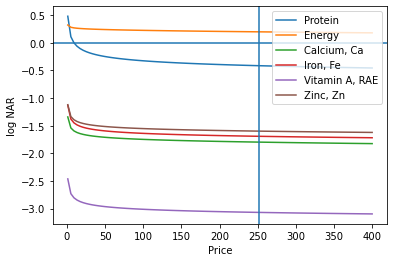

In [75]:
#not touching this was for milk powder
#tracing nutritional adaquacy while changing price of a certain good
poorer_x = reference_x
#reference_x = the average budget
Pscale = np.linspace(1,400,100).tolist()
#need to change scale to fit the price of the good
log_nar = {s0:np.log(nutrient_adequacy_ratio(reference_x,my_prices(s0,p,i=USE_GOOD)))[UseNutrients] for s0 in Pscale}

log_nar = pd.DataFrame(log_nar).T

ax = log_nar.plot(ylabel='log NAR',xlabel='Price')


ax.axhline(0)
#ax.set_xlim([1,3])
ax.axvline(p[USE_GOOD])

In [76]:
USE_GOOD = 'Milk powder'

Text(0.5, 1.0, 'Effect of Varying Milk Powder Price on Calcium Nutrition')

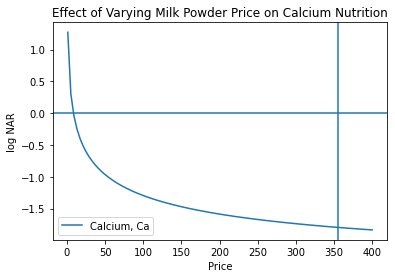

In [77]:
#tracing nutritional adaquacy while changing price of a certain good
poorer_x = reference_x/2
#reference_x = the average budget
Pscale = np.linspace(1,400,100).tolist()
#need to change scale to fit the price of the good
UseNutrients = ['Calcium, Ca']
log_nar = {s0:np.log(nutrient_adequacy_ratio(reference_x,my_prices(s0,p,i=USE_GOOD)))[UseNutrients] for s0 in Pscale}

log_nar = pd.DataFrame(log_nar).T

ax = log_nar.plot(ylabel='log NAR',xlabel='Price')


ax.axhline(0)
#ax.set_xlim([1,3])
ax.axvline(p[USE_GOOD])
ax.set_title('Effect of Varying Milk Powder Price on Calcium Nutrition')

In [78]:
!pip install CFEDemands --upgrade --pre
!pip install xarray

Requirement already up-to-date: CFEDemands in /opt/conda/lib/python3.9/site-packages (0.4.1)


In [79]:
r.get_beta(as_df = True).dropna().sort_values(ascending = False)

i
Milk powder                             0.621545
Sugar                                   0.569223
Rice-local                              0.557892
Chocolate drinks                        0.541461
Rice-Imported                           0.535315
Seafood (lobster, crab, prawns)         0.528855
Agricultural eggs                       0.492709
Condiments,(salt,spices,pepper, etc)    0.414796
Fish-Dried                              0.403277
Sachet water                            0.403258
Fish-Fresh                              0.386942
White beans                             0.371580
Onions                                  0.368187
Fish-Smoked                             0.354824
Bread                                   0.346662
Soft drinks (Coca cola, spirit etc)     0.346603
Groundnut oil                           0.344536
Sweet Potatoes                          0.339676
Malt drinks                             0.338216
Tomato puree(canned)                    0.337039
Bananas           

## Deliverable [C] Value of Technological Innovation

We now move into looking at how the inlcusion of Golden Rice can change the nutrient system in Nigeria.

In [80]:
import fooddatacentral as fdc
#apikey = "98io1g6FBoC8R3VH3ixwfMmoZHEtTge9UyS9kouU"
apikey = "6dOSTulT97hD6btEezfeO876tZyzbrLhmY0LL8uf"
id = 169400    # Put an FDC ID HERE!
fdc.nutrients(apikey,fdc_id=id)

,Quantity,Units
Proximates,0.000,g
Water,92.500,g
Energy,96.000,kJ
Protein,2.980,g
Total lipid (fat),0.780,g
Ash,1.040,g
Carbohydrates,0.000,g
"Carbohydrate, by difference",2.710,g
"Fiber, total dietary",2.100,g
Minerals,0.000,mg


In [81]:
fdc.search(apikey = apikey ,term = 'Golden Rice')
#golden rice doesn't exist so going to manually input the vitamin A

,fdcId,description,lowercaseDescription,commonNames,additionalDescriptions,dataType,foodCode,publishedDate,foodCategory,foodCategoryId,allHighlightFields,score,foodNutrients,finalFoodInputFoods,foodMeasures,foodAttributes,foodAttributeTypes,foodVersionIds,scientificName,ndbNumber
0,1104462,Golden Cadillac,golden cadillac,,,Survey (FNDDS),93301340.0,2020-10-30,Liquor and cocktails,1000181.0,,380.92505,"[{'nutrientId': 1003, 'nutrientName': 'Protein...","[{'foodDescription': 'Cordial or liqueur', 'gr...","[{'disseminationText': '1 fl oz', 'gramWeight'...",[],"[{'name': 'Attribute', 'description': 'Generic...",[],NaN,NaN
1,168164,"Raisins, golden, seedless","raisins, golden, seedless",,,SR Legacy,NaN,2019-04-01,Fruits and Fruit Juices,NaN,,347.30807,"[{'nutrientId': 1186, 'nutrientName': 'Folic a...",[],[],[],[],[],Vitis vinifera,9297.0
2,1101814,Cereal (Post Golden Crisp),cereal (post golden crisp),,,Survey (FNDDS),57355000.0,2020-10-30,"Ready-to-eat cereal, higher sugar (>21.2g/100g)",997533.0,,319.15660,"[{'nutrientId': 1003, 'nutrientName': 'Protein...","[{'foodDescription': 'Cereals ready-to-eat, PO...","[{'disseminationText': '1 cup', 'gramWeight': ...",[],"[{'name': 'Attribute', 'description': 'Generic...",[],NaN,NaN
3,168077,"DENNY'S, golden fried shrimp","denny's, golden fried shrimp",family style,,SR Legacy,NaN,2019-04-01,Restaurant Foods,NaN,,319.15660,"[{'nutrientId': 1304, 'nutrientName': 'TFA 18:...",[],[],[],[],[],NaN,36612.0
4,168202,"Apples, raw, golden delicious, with skin","apples, raw, golden delicious, with skin",,,SR Legacy,NaN,2019-04-01,Fruits and Fruit Juices,NaN,,295.23790,"[{'nutrientId': 1257, 'nutrientName': 'Fatty a...",[],[],[],[],[],Malus domestica,9501.0
5,167979,"Candies, HERSHEY'S GOLDEN ALMOND SOLITAIRES","candies, hershey's golden almond solitaires",,,SR Legacy,NaN,2019-04-01,Sweets,NaN,,295.23790,"[{'nutrientId': 1104, 'nutrientName': 'Vitamin...",[],[],[],[],[],NaN,19084.0
6,1101739,Cereal (General Mills Golden Grahams),cereal (general mills golden grahams),,,Survey (FNDDS),57224000.0,2020-10-30,"Ready-to-eat cereal, higher sugar (>21.2g/100g)",997458.0,,295.23790,"[{'nutrientId': 1003, 'nutrientName': 'Protein...","[{'foodDescription': 'Cereals ready-to-eat, GE...","[{'disseminationText': '1 cup', 'gramWeight': ...",[],"[{'name': 'Attribute', 'description': 'Generic...",[],NaN,NaN
7,1102467,Dirty rice,dirty rice,,cajun rice;rice cooked with chicken giblets,Survey (FNDDS),58163130.0,2020-10-30,Rice mixed dishes,998186.0,<b>Includes</b>: cajun <em>rice</em>;<em>rice<...,285.72043,"[{'nutrientId': 1003, 'nutrientName': 'Protein...","[{'foodDescription': 'Chicken, broilers or fry...","[{'disseminationText': '1 cup', 'gramWeight': ...",[],"[{'name': 'Additional Description', 'descripti...",[],NaN,NaN
8,1097552,Rice milk,rice milk,,Rice Dream beverage,Survey (FNDDS),11360000.0,2020-10-30,Milk substitutes,993271.0,<b>Includes</b>: <em>Rice</em> Dream beverage,284.77190,"[{'nutrientId': 1003, 'nutrientName': 'Protein...","[{'foodDescription': 'Beverages, rice milk, un...","[{'disseminationText': '1 cup', 'gramWeight': ...",[],"[{'name': 'Additional Description', 'descripti...",[],NaN,NaN
9,1101306,"Crackers, rice","crackers, rice",,Edward and Sons;San-J;brown rice cracker;KA-ME...,Survey (FNDDS),54319000.0,2020-10-30,"Crackers, excludes saltines",997025.0,<b>Includes</b>: Edward and Sons;San-J;brown <...,284.10898,"[{'nutrientId': 1003, 'nutrientName': 'Protein...","[{'foodDescription': 'Rice crackers', 'gramWei...","[{'disseminationText': '1 cup, NFS', 'gramWeig...",[],"[{'name': 'Additional Description', 'descripti...",[],NaN,NaN


In [82]:
#their vitamin A is in microgram 
#https://www.sciencedaily.com/releases/2009/05/090513121102.htm#:~:text=Golden%20Rice%20was%20developed%20in,of%20beta%2Dcarotene%20per%20gram. 
#35 micrograms/gram
fct['Vitamin A, RAE']['Rice-local'] = 3500
fct['Vitamin A, RAE']['Rice-Imported'] = 3500
fct['Vitamin A, RAE']

i
Guinea corn/sorghum             0.0
Millet                          0.0
Maize                           9.0
Rice-local                   3500.0
Rice-Imported                3500.0
                              ...  
Beer (local and imported)       0.0
Palm wine                       0.0
Pito                            0.0
Gin                             0.0
Other alcoholic beverages       0.0
Name: Vitamin A, RAE, Length: 96, dtype: float64

In [83]:
fct['Vitamin A, RAE']

i
Guinea corn/sorghum             0.0
Millet                          0.0
Maize                           9.0
Rice-local                   3500.0
Rice-Imported                3500.0
                              ...  
Beer (local and imported)       0.0
Palm wine                       0.0
Pito                            0.0
Gin                             0.0
Other alcoholic beverages       0.0
Name: Vitamin A, RAE, Length: 96, dtype: float64

In [84]:
def my_prices(p0,p=p,i='Coconut'):
    p = p.copy()
    p.loc[i] = p0
    return p

In [85]:
import warnings 

def nutrient_demand(x,p):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        c = r.demands(x,p)

    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

In [86]:
#nutritional adaquecy part
def nutrient_adequacy_ratio(x,p):
    return nutrient_demand(x,p)/hh_rda

In [87]:
fct['Vitamin A, RAE']

i
Guinea corn/sorghum             0.0
Millet                          0.0
Maize                           9.0
Rice-local                   3500.0
Rice-Imported                3500.0
                              ...  
Beer (local and imported)       0.0
Palm wine                       0.0
Pito                            0.0
Gin                             0.0
Other alcoholic beverages       0.0
Name: Vitamin A, RAE, Length: 96, dtype: float64

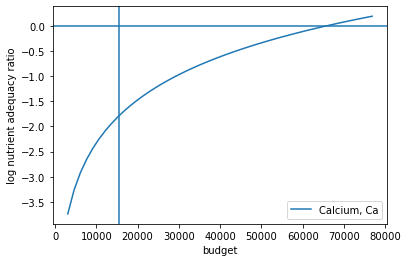

In [88]:
#the normal one
X = np.linspace(reference_x/5,reference_x*5,50)

ndf = pd.concat({x:np.log(nutrient_adequacy_ratio(x,p))[UseNutrients] for x in X},axis=1).T

ax = ndf.plot()

ax.set_xlabel('budget')
ax.set_ylabel('log nutrient adequacy ratio')
ax.axhline(0)
ax.axvline(reference_x)

In [89]:
r.get_beta(as_df = True).index.to_list()

['(Cocoyam, Spinach, etc)',
 'Agricultural eggs',
 'Animal fat',
 'Apples',
 'Avocado pear',
 'Baby milk powder',
 'Bananas',
 'Beef',
 'Beer (local and imported)',
 'Biscuits',
 'Bottled water',
 'Bread',
 'Brown beans',
 'Buns/PofPof/Donuts',
 'Butter/Margarine',
 'Cake',
 'Canned',
 'Canned beef/corned beef',
 'Canned fish/seafood',
 'Cashew nut',
 'Cassava flour',
 'Cassava-Roots',
 'Cheese (wara)',
 'Chicken',
 'Chocolate drinks',
 'Coconut',
 'Coconut oil',
 'Cocoyam',
 'Coffee',
 'Condiments,(salt,spices,pepper, etc)',
 'Dry pepper',
 'Duck',
 'Fish-Dried',
 'Fish-Fresh',
 'Fish-Frozen',
 'Fish-Smoked',
 'Fresh milk',
 'Fresh pepper',
 'Fruit juice canned',
 'Garden eggs/egg plant',
 'Gari -Yellow',
 'Gari-White',
 'Gin',
 'Goat',
 'Grinded pepper',
 'Groundnut oil',
 'Groundnuts',
 'Groundnuts (shelled)',
 'Groundnuts (unshelled)',
 'Guava',
 'Guinea Corn/Sorghum',
 'Honey',
 'Jams',
 'Kola nut',
 'Local eggs',
 'Maize',
 'Maize (off the cob/grains)',
 'Maize (on the cob)',
 'M

In [90]:
#r.get_predicted_expenditures().sel(i='Rice--local')

In [91]:
r.get_beta(as_df = True).dropna().sort_values(ascending = False)
#use this to show can't really find an elastic good that has a lot of calcium

i
Milk powder                             0.621545
Sugar                                   0.569223
Rice-local                              0.557892
Chocolate drinks                        0.541461
Rice-Imported                           0.535315
Seafood (lobster, crab, prawns)         0.528855
Agricultural eggs                       0.492709
Condiments,(salt,spices,pepper, etc)    0.414796
Fish-Dried                              0.403277
Sachet water                            0.403258
Fish-Fresh                              0.386942
White beans                             0.371580
Onions                                  0.368187
Fish-Smoked                             0.354824
Bread                                   0.346662
Soft drinks (Coca cola, spirit etc)     0.346603
Groundnut oil                           0.344536
Sweet Potatoes                          0.339676
Malt drinks                             0.338216
Tomato puree(canned)                    0.337039
Bananas           

## Deliverabl [C] Policy Cost

We can now estimate the cost of our policy proposal to susidize certain foods that increase nutritional value. For our example, we consider Milk Powder as shown previously.

In [92]:
URL = {'Uganda':'https://docs.google.com/spreadsheets/d/1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ/',
       'Tanzania':'https://docs.google.com/spreadsheets/d/1Tknc2F8K6SaA7j0R7J_NE8yJBTsCPPw77_Bfc04MY40/',
       'Indian ICRISAT':'https://docs.google.com/spreadsheets/d/13Ig5hZif-NSHtgkKRp_cEgKXk0lOsdUB2BAD6O_FnRo'}

DAYS_PER_PERIOD = {'Uganda':7,'Nigeria':7,'Indian ICRISAT':365.25} # Number of days of expenditure recall

In [93]:
COUNTRY = 'Nigeria'

r = cfe.from_dataset("%s_small.ds" % COUNTRY,engine='netcdf4')

We begin by setting up some benchmarks for prices and budgets, so the things we don't want to change we can hold fixed.

In [94]:
r.prices = r.prices.sel(u=['kilogram (kg)','1. KILOGRAMS (KG)','Kilograms']).dropna('i',how='all').sum('u')

In [95]:
r.prices

<xarray.DataArray 'prices' (t: 4, m: 1, i: 103)>
array([[[6.83156210e+01, 2.02653897e+02, 0.00000000e+00, 7.22254570e+01,
         2.31375755e+02, 9.08218550e+01, 4.61599232e+02, 3.87542960e+01,
         0.00000000e+00, 1.02388627e+02, 1.42080756e+02, 1.30242559e+02,
         1.28150683e+02, 4.30368140e+01, 4.58833620e+01, 4.40628414e+02,
         3.01045120e+01, 3.44441980e+01, 0.00000000e+00, 5.13588919e+02,
         6.74060828e+02, 6.23841840e+01, 6.53846154e+02, 2.57030500e+00,
         0.00000000e+00, 3.10970380e+02, 2.52308978e+02, 2.93192625e+02,
         2.98477485e+02, 7.62623000e-01, 1.62085961e+02, 0.00000000e+00,
         1.03251146e+02, 5.81656720e+01, 9.22227540e+01, 5.80327330e+01,
         4.86575342e+02, 3.99886122e+02, 0.00000000e+00, 2.21239344e+02,
         7.11480070e+01, 5.37322980e+01, 1.75734410e+02, 2.01940242e+02,
         7.51657920e+01, 6.05089150e+01, 0.00000000e+00, 9.52308390e+01,
         9.77766850e+01, 5.23955010e+01, 0.00000000e+00, 0.00000000e+00,
         3.55316887e+02, 1.37791363e+02, 4.98581750e+01, 5.49833980e+01,
         0.00000000e+00, 1.40781098e+02, 1.00610711e+02, 3.28841100e+00,
         7.08749650e+01, 2.26201673e+02, 1.04607811e+02, 1.74485676e+02,
         3.49958089e+02, 3.65171249e+02, 8.35546100e+01, 6.62980870e+01,
         1.21676609e+02, 3.76543771e+02, 1.71135171e+02, 1.59940677e+02,
         1.04251010e+02, 2.14129725e+02, 1.27165962e+02, 2.57770350e+01,
         2.22521857e+02, 0.00000000e+00, 1.50728058e+02, 9.39798170e+01,
...
         0.00000000e+00, 0.00000000e+00, 6.61111111e+02, 8.16279070e+02,
         8.15217391e+02, 4.40000000e+02, 0.00000000e+00, 1.15000000e+02,
         0.00000000e+00, 0.00000000e+00, 2.35955056e+02, 8.00000000e+01,
         0.00000000e+00, 1.08570186e+03, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 2.00666667e+02, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 2.08666667e+02, 1.98960646e+02,
         0.00000000e+00, 0.00000000e+00, 7.50000000e+02, 1.00000000e+03,
         1.51675127e+03, 1.40000000e+03, 3.00000000e+02, 1.07169163e+03,
         0.00000000e+00, 1.50000000e+02, 4.50000000e+02, 1.59555556e+02,
         1.00000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         3.22170819e+02, 5.00000000e+02, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 8.00000000e+01, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 1.21520360e+03, 0.00000000e+00,
         3.62374311e+02, 2.92650541e+02, 0.00000000e+00, 1.55217391e+02,
         1.50000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         5.66666667e+02, 2.65517241e+02, 1.62352941e+03, 0.00000000e+00,
         1.50000000e+02, 1.20000000e+02, 2.30318693e+02, 6.00000000e+02,
         1.15082254e+03, 1.08333333e+03, 0.00000000e+00]]])
Coordinates:
  * i        (i) object '(Cocoyam, Spinach, etc)' ... 'Yam-roots'
  * t        (t) int64 2010 2012 2015 2018
  * m        (m) int64 1

In [96]:
import numpy as np

### First year, first market, and some good.  Change if you wish! ###
my_t = r.coords['t'].data.flatten()[0] # Period
my_m = r.coords['m'].data.flatten()[0] # Market
my_i = 'Milk powder' # r.coords['i'].data.flatten()[0] # Good
#####################################################################

# p = r.prices.sel(u=['kilogram (kg)','1. KILOGRAMS (KG)','Kilograms'],t=my_t,m=my_m,drop=True)
p = r.prices.sel(t=my_t,m=my_m,drop=True)
phat = p.to_dataframe('i').dropna().squeeze()

ref_price = r.prices.sel(i=my_i,t=my_t,m=my_m)
# ref_price = r.prices.sel(u=['kilogram (kg)','1. KILOGRAMS (KG)','Kilograms'],i=my_i,t=my_t,m=my_m)
P = np.linspace(ref_price/10,ref_price*5,50)

def my_prices(p0,p=phat,i=my_i):
    """
    Set price of good i to p0, holding remaining prices fixed at values in p.
    """
    p = p.copy()
    p.loc[i] = p0
    return p.squeeze()

# phat.u
phat

i
(Cocoyam, Spinach, etc)     68.315621
Agricultural eggs          202.653897
Animal fat                   0.000000
Avocado pear                72.225457
Baby milk powder           231.375755
                              ...    
Wheat flour                 98.954978
White beans                101.311511
Wild game meat             426.200899
Yam flour                  225.491453
Yam-roots                   61.296256
Name: i, Length: 103, dtype: float64

We will now change the price to see how things change and we will compare both the Marshallian and Hicksian demands.

In [97]:
# A quantile of 0.5 is the median.  Play with quantile value, or just assign.
xbar = r.get_predicted_expenditures().sel(t=my_t,m=my_m).sum('i')

# Drop households with /no/ predicted expenditures
xbar = xbar.where(xbar>0)

x0 = xbar.quantile(0.5,'j') # Budget (median household)
#x0 = 50

# Range of budgets to explore
X = np.linspace(x0/10,x0*5,50)

/opt/conda/lib/python3.9/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


In [98]:
my_prices

<function __main__.my_prices(p0, p=i
(Cocoyam, Spinach, etc)     68.315621
Agricultural eggs          202.653897
Animal fat                   0.000000
Avocado pear                72.225457
Baby milk powder           231.375755
                              ...    
Wheat flour                 98.954978
White beans                101.311511
Wild game meat             426.200899
Yam flour                  225.491453
Yam-roots                   61.296256
Name: i, Length: 103, dtype: float64, i='Milk powder')>

In [99]:
my_prices(P[0],i=my_i)

i
(Cocoyam, Spinach, etc)     68.315621
Agricultural eggs          202.653897
Animal fat                   0.000000
Avocado pear                72.225457
Baby milk powder           231.375755
                              ...    
Wheat flour                 98.954978
White beans                101.311511
Wild game meat             426.200899
Yam flour                  225.491453
Yam-roots                   61.296256
Name: i, Length: 103, dtype: float64

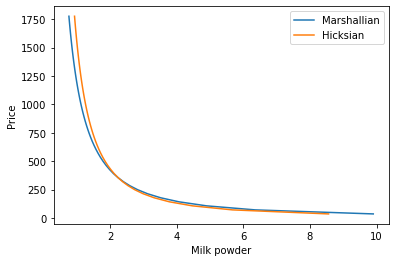

In [100]:
import matplotlib.pyplot as plt

U0 = r.indirect_utility(x0,p)

plt.plot([r.demands(x0,my_prices(p0,i=my_i))[my_i] for p0 in P],P)
plt.plot([r.demands(U0,my_prices(p0,i=my_i),type="Hicksian")[my_i] for p0 in P],P)
plt.ylabel('Price')
plt.xlabel(my_i)
#plt.axhline(p.sel(i=my_i).values)
plt.legend(("Marshallian","Hicksian"))

Now we will consider welfare measures.

In [101]:
def compensating_variation(U0,p0,p1):
    x0 = r.expenditure(U0,p0)
    x1 = r.expenditure(U0,p1)

    return x1-x0

def revenue(U0,p0,p1,type='Marshallian'):
    """(Un)Compensated revenue from taxes changing vector of prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    
    dp = p1 - p0 # Change in prices

    c = r.demands(U0,p1,type=type)

    dp,c = dp.align(c,join='inner')

    return dp.T@c


def deadweight_loss(U0,p0,p1):
    """
    Deadweight loss of tax/subsidy scheme creating wedge in prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    cv = compensating_variation(U0,p0,p1)

    return cv - revenue(U0,p0,p1,type='Hicksian') 
    
    
def compensated_nutrient_demand(U,p,z=None):
    c = r.demands(U,p,z=z,type='Hicksian')
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    return N

def compensated_nutrient_adequacy_ratio(U,p):
    return (compensated_nutrient_demand(U,p)/hh_rdi.T).squeeze()

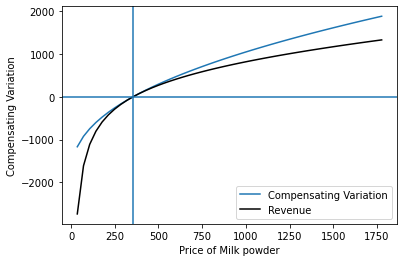

In [102]:
fig, ax1 = plt.subplots()

ax1.plot(P,[compensating_variation(U0,phat,my_prices(p0,i=my_i)) for p0 in P])
ax1.set_xlabel("Price of %s" % my_i)
ax1.set_ylabel("Compensating Variation")

ax1.plot(P,[revenue(U0,phat,my_prices(p0,i=my_i),type='Hicksian') for p0 in P],'k')
ax1.legend(('Compensating Variation','Revenue'))
ax1.axhline(0)
ax1.axvline(phat.loc[my_i])

We will also consider the deadweight loss.

Text(0, 0.5, 'Deadweight Loss')

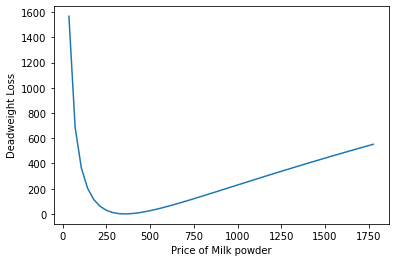

In [103]:
fig, ax1 = plt.subplots()

ax1.plot(P,[deadweight_loss(U0,phat,my_prices(p0,i=my_i)) for p0 in P])
ax1.set_xlabel("Price of %s" % my_i)
ax1.set_ylabel("Deadweight Loss")